## Chargement et préparation des données

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
import os
df = pd.read_csv("Pokemon.csv")
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## Analyse descriptive des données

In [7]:
print(df.shape)
print('Columns : \n', list(df.columns))
print(df.info())
print('Missing values :\n',df.isna().sum().sort_values(ascending=False))

(800, 13)
Columns : 
 ['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB
None
Missing values :
 Type 2        386
#               0
Name            0
Type 1  

# Nettoyage et préparation

In [9]:
for c in ['Type 1', 'Type 2']:
    if c in df.columns:
        df[c] = df[c].astype(str).str.title().replace('Nan', np.nan)

df['Type 2'] = df['Type 2'].fillna('Aucun')

# Conversion of Legendary
df['Legendary'] = df['Legendary'].astype(str).str.lower().map({'true': True, 'false': False})
df['Legendary'] = df['Legendary'].fillna(False)

print("Données nettoyées et cohérentes.")
df.head(3)


Données nettoyées et cohérentes.


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


# Statistique descriptive global

In [24]:
# Statistiques descriptives pour les colonnes numériques
df.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
#,800.0,362.81375,208.343798,1.0,184.75,364.5,539.25,721.0
Total,800.0,435.10250,119.963040,180.0,330.00,450.0,515.00,780.0
HP,800.0,69.25875,25.534669,1.0,50.00,65.0,80.00,255.0
Attack,800.0,79.00125,32.457366,5.0,55.00,75.0,100.00,190.0
Defense,800.0,73.84250,31.183501,5.0,50.00,70.0,90.00,230.0
Sp. Atk,800.0,72.82000,32.722294,10.0,49.75,65.0,95.00,194.0
Sp. Def,800.0,71.90250,27.828916,20.0,50.00,70.0,90.00,230.0
Speed,800.0,68.27750,29.060474,5.0,45.00,65.0,90.00,180.0
Generation,800.0,3.32375,1.661290,1.0,2.00,3.0,5.00,6.0


In [25]:
# Aperçu des colonnes de type
cols_type = [c for c in df.columns if 'type' in c.lower()]
for c in cols_type:
    print(f'\n{c}: {df[c].nunique()} catégories')
    print(df[c].unique()[:10])


Type 1: 18 catégories
['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting']

Type 2: 18 catégories
['Poison' nan 'Flying' 'Dragon' 'Ground' 'Fairy' 'Grass' 'Fighting'
 'Psychic' 'Steel']


# Distribution des variables numériques

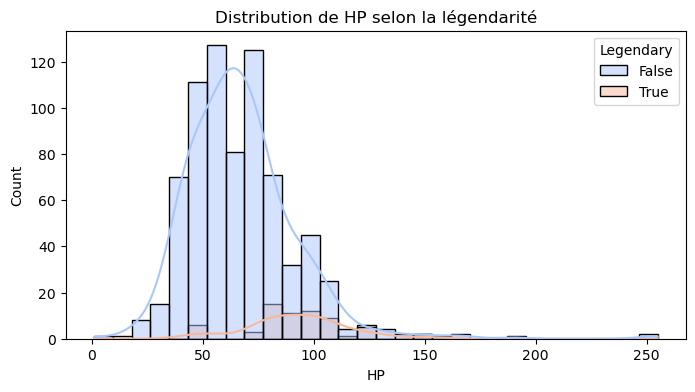

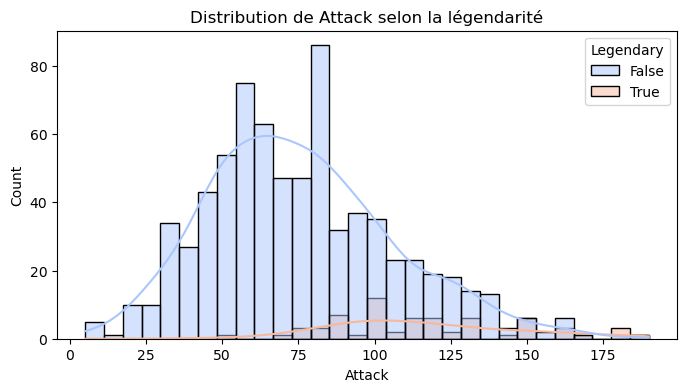

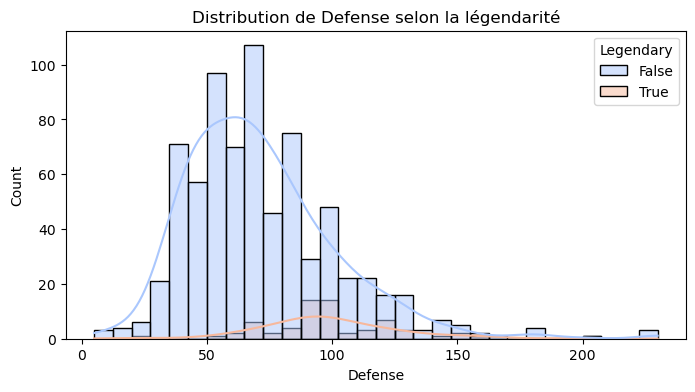

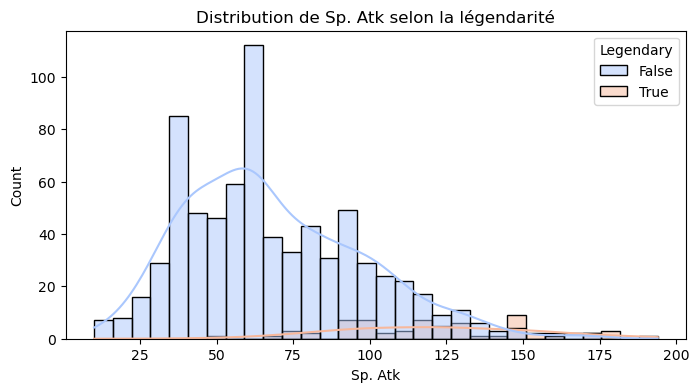

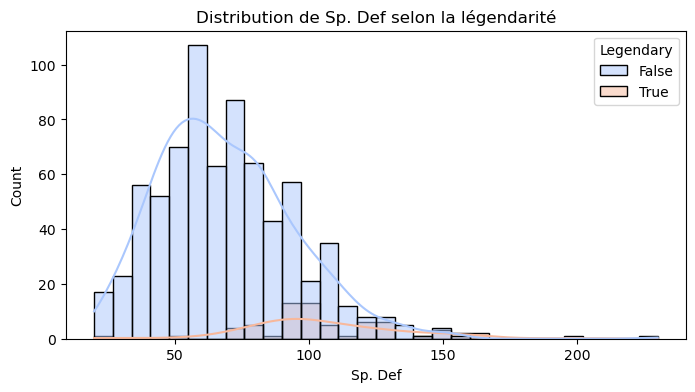

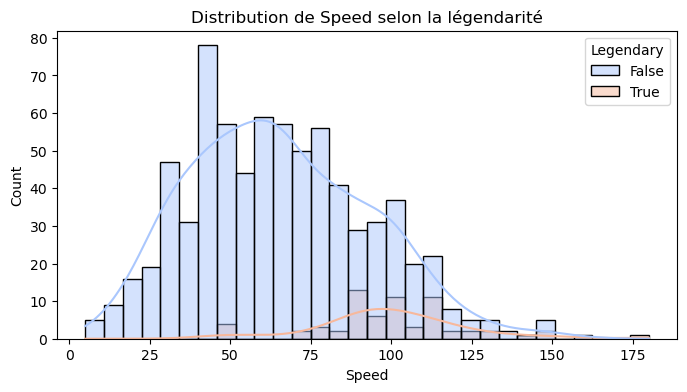

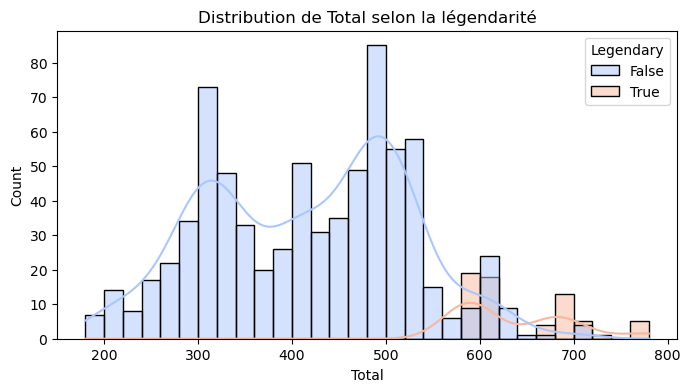

In [ ]:
features_num = ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','Total']

for col in features_num:
    plt.figure(figsize=(8,4))
    sns.histplot(df, x=col, hue='Legendary', bins=30, kde=True, palette='coolwarm')
    plt.title(f'Distribution de {col} selon la légendarité')
    plt.show()


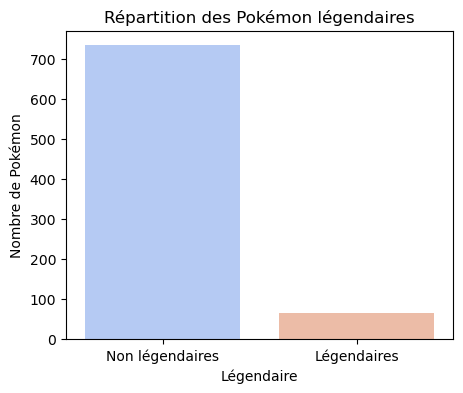

Legendary
False    735
True      65
Name: count, dtype: int64


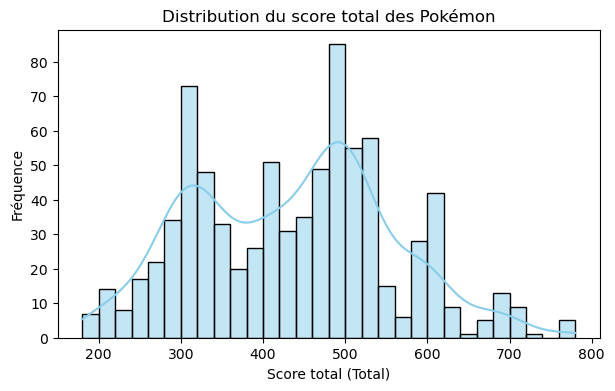

In [ ]:
# Répartition du statut légendaire
if 'Legendary' in df.columns:
    counts = df['Legendary'].value_counts()
    plt.figure(figsize=(5,4))
    sns.barplot(x=counts.index, y=counts.values, palette='coolwarm')
    plt.title("Répartition des Pokémon légendaires")
    plt.xlabel("Légendaire")
    plt.ylabel("Nombre de Pokémon")
    plt.xticks([0,1], ['Non légendaires', 'Légendaires'])
    plt.show()
    print(counts)
else:
    print("Aucune colonne 'Legendary' trouvée.")

# Distribution des scores totaux
if 'Total' in df.columns:
    plt.figure(figsize=(7,4))
    sns.histplot(df['Total'], bins=30, kde=True, color='skyblue')
    plt.title("Distribution du score total des Pokémon")
    plt.xlabel("Score total (Total)")
    plt.ylabel("Fréquence")
    plt.show()
else:
    print("Aucune colonne 'Total' trouvée.")


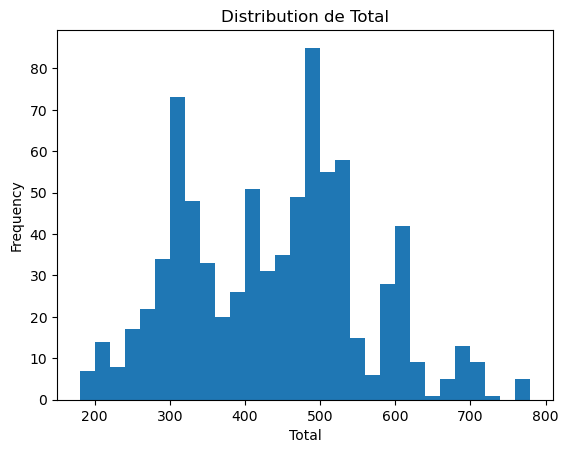

In [27]:
# Visualisation simple : distribution de la colonne Total
if 'Total' in df.columns:
    df['Total'].plot(kind='hist', bins=30, title='Distribution de Total')
    plt.xlabel('Total')
    plt.show()
else:
    print('Pas de colonne Total.')

# Comparaison statistiques légendaires vs non-légendaires

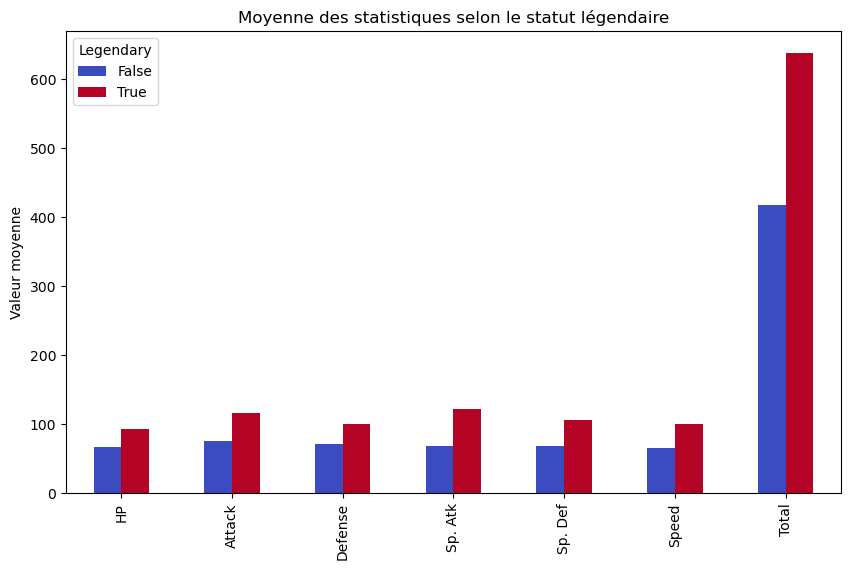

In [ ]:
mean_comparison = df.groupby('Legendary')[features_num].mean().T
mean_comparison.plot(kind='bar', figsize=(10,6), colormap='coolwarm')
plt.title('Moyenne des statistiques selon le statut légendaire')
plt.ylabel('Valeur moyenne')
plt.show()


# Corrélation entre variables numériques

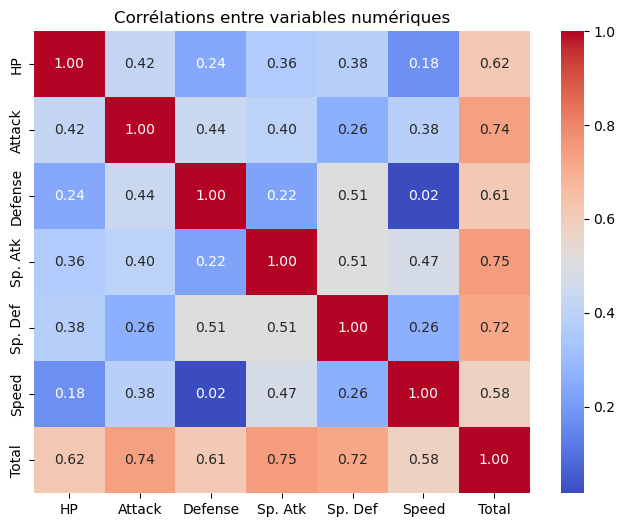

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df[features_num].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Corrélations entre variables numériques')
plt.show()


# Répartition des types et générations

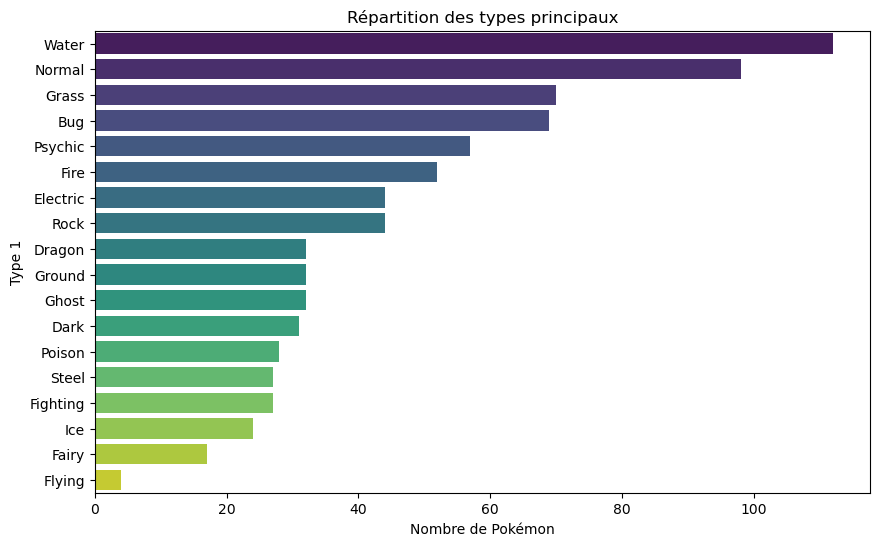

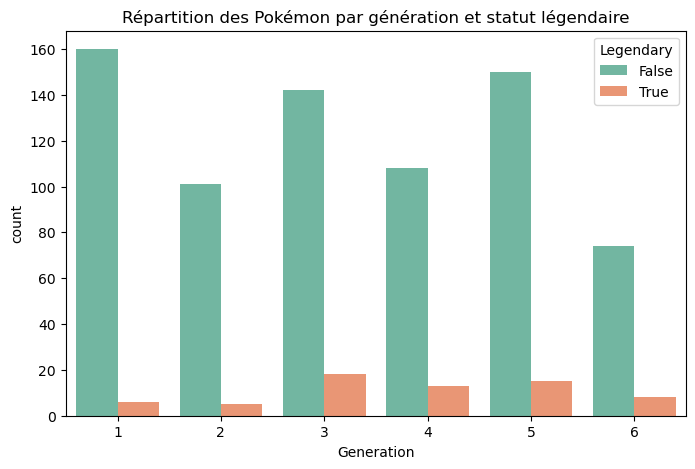

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(y='Type 1', data=df, order=df['Type 1'].value_counts().index, palette='viridis')
plt.title('Répartition des types principaux')
plt.xlabel('Nombre de Pokémon')
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(x='Generation', data=df, hue='Legendary', palette='Set2')
plt.title('Répartition des Pokémon par génération et statut légendaire')
plt.show()


# Tests de significativité

In [ ]:
print("Tests de Student (légendaires vs non-légendaires)\n")
for col in features_num:
    stat, p = ttest_ind(df[df['Legendary']==True][col],
                        df[df['Legendary']==False][col],
                        equal_var=False)
    print(f"{col:<10} → p-value = {p:.4e}")


Tests de Student (légendaires vs non-légendaires)

HP         → p-value = 1.0027e-13
Attack     → p-value = 2.5204e-16
Defense    → p-value = 4.8270e-11
Sp. Atk    → p-value = 1.5515e-21
Sp. Def    → p-value = 2.2949e-15
Speed      → p-value = 1.0490e-18
Total      → p-value = 9.3580e-47


Les p-values sont toutes < 0.05, confirmant que les différences observées entre légendaires et non-légendaires sont statistiquement significatives.
On peut donc affirmer que la légendarité n’est pas due au hasard, mais bien corrélée à des différences structurelles dans les statistiques.

# Analyse PCA (réduction de dimension)

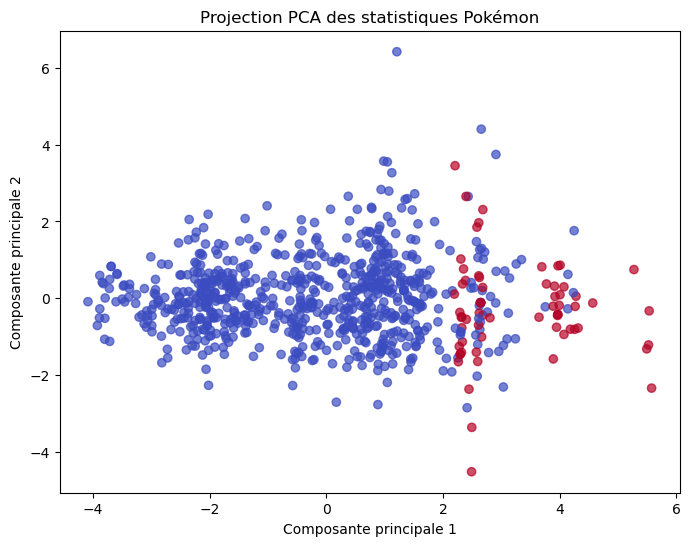

In [ ]:
X_scaled = StandardScaler().fit_transform(df[features_num])
pca = PCA(n_components=2)
coords = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(coords[:,0], coords[:,1], c=df['Legendary'], cmap='coolwarm', alpha=0.7)
plt.title('Projection PCA des statistiques Pokémon')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.show()


Le dataset Pokémon est propre et bien structuré.
Les Pokémon légendaires représentent environ 9 % du total.
Ils se distinguent par des valeurs extrêmes de HP, Attack, Defense, et surtout Total.
Les différences sont statistiquement significatives.
La PCA montre une séparation nette entre légendaires et non-légendaires.
Ces observations justifient l’utilisation d’un modèle de classification supervisée.
Les variables les plus discriminantes seront probablement : Total, Sp Atk, Attack et Defense.
